In [6]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice
from pprint import pprint
from matplotlib import pyplot as plt
from IPython.display import Markdown, display, Image
from pymatgen import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator

import numpy as np
def printmd(string):
    display(Markdown(string))


with MPRester("Wn9s8arGa4zDtsqw59e") as m:
    structure = m.get_structure_by_material_id("mp-4636")
    w = CifWriter(structure)
    w.write_file('mystructure_4.cif')

In [7]:
print('Lorsque nous envoyons des rayons X sur des cristaux, on observe des phénomènes d interférences qui selon la direction sont destructives ou constructives. A partir de l image de diffraction, il est possible, sous certaines réserves de déterminer la position de tous les atomes de la structure. Dans cette partie, nous allons nous intéresser aux pics du diffractogramme pour un rayonnement X incident CuK\u03B1 de longueur d’onde \u03BB=1.54060 Angstrom sur le matériau ScCuO\u2082 ')
print('Comme demandé, nous allons principalement nous concentrer sur les trois premiers pics ')

Lorsque nous envoyons des rayons X sur des cristaux, on observe des phénomènes d interférences qui selon la direction sont destructives ou constructives. A partir de l image de diffraction, il est possible, sous certaines réserves de déterminer la position de tous les atomes de la structure. Dans cette partie, nous allons nous intéresser aux pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Angstrom sur le matériau ScCuO₂ 
Comme demandé, nous allons principalement nous concentrer sur les trois premiers pics 


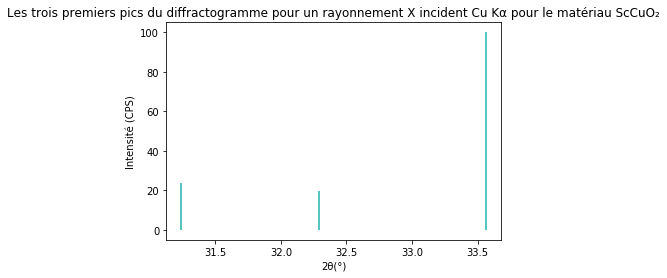

In [11]:
plt.title("Les trois premiers pics du diffractogramme pour un rayonnement X incident Cu K\u03B1 pour le matériau ScCuO\u2082")
plt.xlabel('2\u03B8(\u00b0)')
plt.ylabel('Intensité (CPS)')
plt.vlines([31.242, 32.288, 33.562], [0, 0, 0, 0], [23.653, 19.573, 100], color="lightseagreen")

In [12]:
print('Je n ai pas pris en compte le tout premier pic (2\u03B8(\u00b0)=15.475, I=0.467) car celui-ci est à peine visible sur le diffractogramme disponible sur Materials Project tellement l intensité est faible. C est pourquoi il ne me semble pas significatif, je l ai donc négligé.')

Je n ai pas pris en compte le tout premier pic (2θ(°)=15.475, I=0.467) car celui-ci est à peine visible sur le diffractogramme disponible sur Materials Project tellement l intensité est faible. C est pourquoi il ne me semble pas significatif, je l ai donc négligé.


In [14]:
c = XRDCalculator()
x = c.get_pattern(structure, scaled=True, two_theta_range=(0, 90))

printmd('**Intensités et angles 2\u03B8 (\u00b0) des trois premiers pics du diffractogramme**')
print('Premier pic : ')
print('2\u03B8(\u00b0) =', (x.x)[1])
print('I =', (x.y)[1])
print('\n')
print('Deuxième pic : ')
print('2\u03B8(\u00b0) =', (x.x)[2])
print('I =', (x.y)[2])
print('\n')
print('Troisième pic : ')
print('2\u03B8(\u00b0) =', (x.x)[3])
print('I =', (x.y)[3])
print('\n')



**Intensités et angles 2θ (°) des trois premiers pics du diffractogramme**

Premier pic : 
2θ(°) = 31.242392196050716
I = 23.65311713407827


Deuxième pic : 
2θ(°) = 32.28801307826653
I = 19.572706937368135


Troisième pic : 
2θ(°) = 33.5619389872051
I = 100.0




In [15]:
printmd('**Les indices (hkl) des trois premiers pics du diffractogramme**')
print('Premier pic:' , x.hkls[1])
print('\n')
print('Deuxième pic:', x.hkls[2])
print('\n')
print('Troisième pic:', x.hkls[3])


**Les indices (hkl) des trois premiers pics du diffractogramme**

Premier pic: [{'hkl': (2, 2, 2), 'multiplicity': 2}]


Deuxième pic: [{'hkl': (1, 0, 0), 'multiplicity': 6}]


Troisième pic: [{'hkl': (1, 1, 0), 'multiplicity': 6}]


**Annexe**

Sur la figure ci-dessous, nous pouvons voir le diffractogramme complet, cela n était pas précisément demandé c est pourquoi je le mets en annexe mais je trouve que c est interessant de le montrer. Le troisième pic, sans prendre en compte le tout premier, est le plus intense de tous.


**Ensemble des pics du diffractogramme**

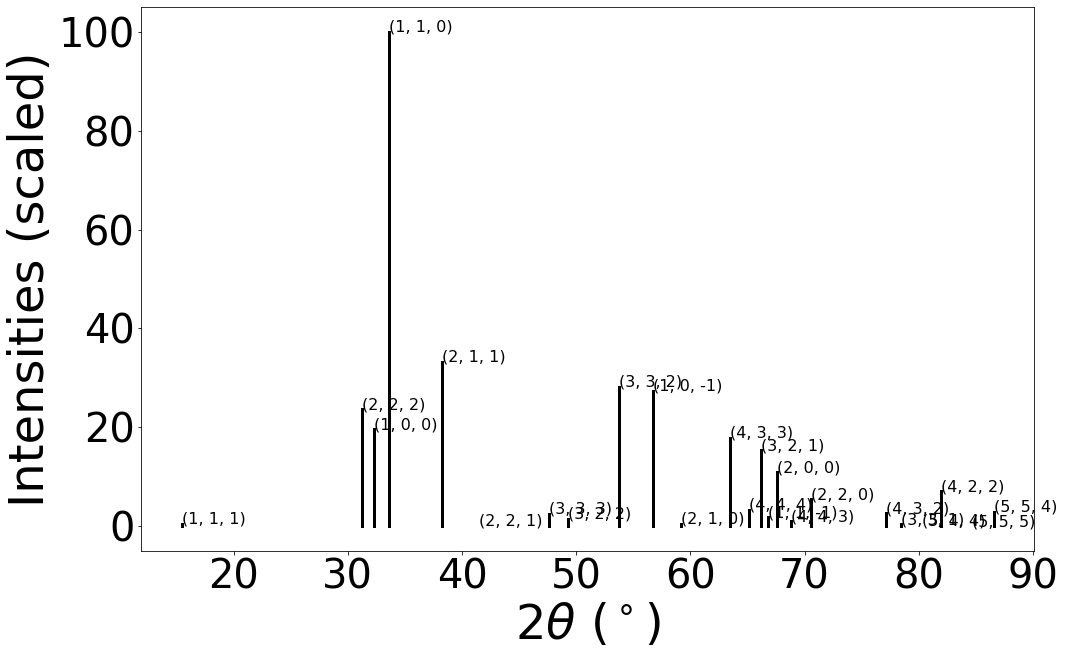

In [16]:
printmd('**Annexe**')
print('Sur la figure ci-dessous, nous pouvons voir le diffractogramme complet, cela n était pas précisément demandé c est pourquoi je le mets en annexe mais je trouve que c est interessant de le montrer. Le troisième pic, sans prendre en compte le tout premier, est le plus intense de tous.')
printmd('**Ensemble des pics du diffractogramme**')
c.show_plot(structure)